In [1]:
import MeCab
mecab = MeCab.Tagger ('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')

In [2]:
from wordcloud import WordCloud

In [3]:
import matplotlib.pyplot as plt

In [4]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [5]:
urls = ["https://rio2016.5ch.net/test/read.cgi/yuusen/1551176765/",
        "http://rio2016.5ch.net/test/read.cgi/yuusen/1544706488/ ",
        "http://rio2016.5ch.net/test/read.cgi/yuusen/1541169519/ ",
        "http://rio2016.5ch.net/test/read.cgi/yuusen/1538735444/",
        "https://rio2016.5ch.net/test/read.cgi/yuusen/1535774252/",
       " https://rio2016.5ch.net/test/read.cgi/yuusen/1530790869/ ",
        "http://rio2016.5ch.net/test/read.cgi/yuusen/1524827811/ ",
        "http://rio2016.5ch.net/test/read.cgi/yuusen/1518128807/ ",
        "http://rio2016.5ch.net/test/read.cgi/yuusen/1510969741/ ",
        "http://rio2016.2ch.net/test/read.cgi/yuusen/1504252926/ ",
        "http://rio2016.2ch.net/test/read.cgi/yuusen/1494632549/ ",
        "http://rio2016.2ch.net/test/read.cgi/yuusen/1475580740/ ",
        "http://rio2016.2ch.net/test/read.cgi/yuusen/1462338524/ ",
        "http://wc2014.2ch.net/test/read.cgi/yuusen/1447482110/"
       ]

In [6]:
ids = []
timestamps = []
names = []
messages = []
titles = []

for url in urls:
    text = requests.get(url).text
    soup = bs(text, "html5lib")

    title_tag =  soup.find_all("h1", {"class":"title"})
    if len(title_tag) > 0:
        title = title_tag[0].text.rstrip('\n')
    else:
        title = '-'
        
    posts =soup.find_all('div', {'class':"post"})
    num_post = len(posts)
    if num_post > 0:
        for i in range(num_post):
            ids.append(int(posts[i]['data-id']))
            names.append(posts[i].find('span', {'class':'name'}).text)
            timestamps.append(posts[i].find('span', {'class':'date'}).text)
            messages.append(posts[i].find_all(('div', {'class':'message'}))[1].text)
            titles.append(title)


In [7]:
df = pd.DataFrame([ids,
                   timestamps,
                   names,
                   messages,
                  titles]).T
df.columns = ["id", 'timestamp','name','message','thread']

In [8]:
df['thread'].value_counts()

KDDI社員スレ25                                           1002
KDDI社員スレ29                                           1002
KDDI社員スレ22                                           1002
KDDI社員スレ26                                           1002
KDDI社員スレ27                                           1002
KDDI社員スレ24                                           1002
KDDI社員スレ23                                           1002
KDDI社員スレ30                                           1002
KDDI社員スレ28                                           1002
KDDI社員スレ21 [無断転載禁止]©2ch.net                          1002
KDDI社員スレ19 [無断転載禁止]&#169;2ch.net [無断転載禁止]©2ch.net    1002
KDDI社員スレ18 [無断転載禁止]©2ch.net                          1002
KDDI社員スレ20 [無断転載禁止]©2ch.net                          1002
Name: thread, dtype: int64

In [9]:
df.to_csv('{}.csv'.format(titles[0]), index=False)

In [10]:
def div_text(text):
    mecab.parse('')
    node = mecab.parseToNode(text)
    output = []
    while node:
            if node.surface != "": 
                word_type = node.feature.split(",")[0]
                if word_type in ["形容詞", "動詞","名詞"]:
#                 if word_type in ["形容詞", "動詞","名詞", "副詞"]:
                    output.append(node.surface)
            node = node.next
            if node is None:
                break
    return output

In [11]:
texts = df['message'].apply(div_text)
word_list = []
for i in range(len(texts)):
    word_list.extend(texts[i])
words = ''
del_list = [ 'http://','http','https', 'www', 'rio', '5ch', '.net', 'test', 'read', 'cgi', 'yuu', 'se',]
for w in word_list:
    if w not in del_list:
        words += w + ' '

In [12]:
def show_wordcloud(words):
    
    font_path="NotoSansCJKjp-Regular.otf"

    # ストップワードの設定
    stop_words = [ 'てる','いる','なる','れる','する','ある','こと','さん',' それ','もん','みたい',\
                  'よう','これ','ない','なり','しろ','なれ','そう','なん','もう','なら','やる','ため','られ',\
                 '思う','まだ','どんどん','それ','られる','なっ','思っ',]

    wordcloud = WordCloud(background_color="white",
                          font_path=font_path, 
                          width=900,
                          height=500, 
                          stopwords=set(stop_words)).generate(words)

    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

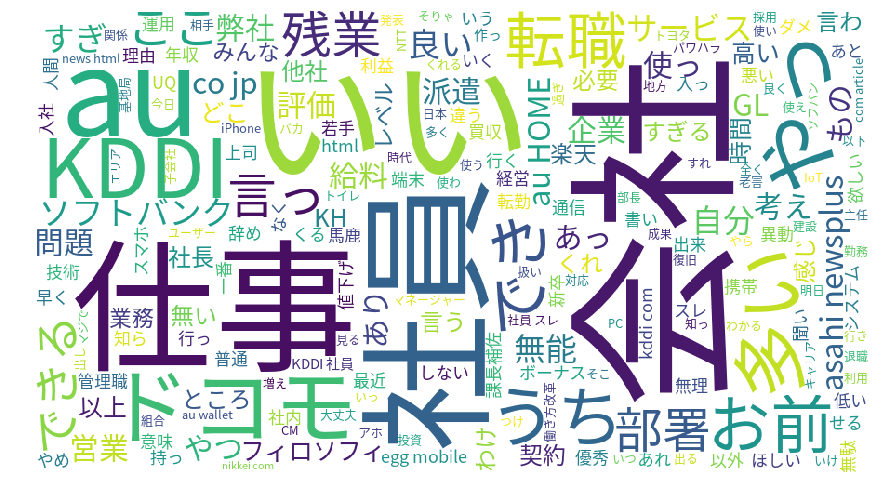

In [13]:
show_wordcloud(words)